tgb - 7/10/2019 - Ultimate goal is to make movies with WMI/Potential/Self-aggregation  
Three steps:  
1) Load data and make movies of PW in dam  
2) Study MSE budget and construct potential  
3) Make movie of potential and how it evolves in time

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime
from ccam import *
from skimage import measure
from scipy import ndimage

# 1) Plot PW field and construct potential

In [2]:
# DAM
# beg = '/scratch/b/b380882/'
# model = 'dam/'
# small = 'RCE_small'
# large = 'RCE_large'
# dim = '2D/'

In [2]:
# ICON_LEM
# beg = '/scratch/b/b380882/'
# model = 'ICON_LEM_CRM/'
# small = 'RCE_small_'
# large = 'RCE_large_'
# dim = '2D/'

In [3]:
# SAM
beg = '/scratch/b/b380882/'
model = 'SAM_CRM/'
small = 'RCE_small'
large = 'RCE_large'
dim = '2D/'

In [4]:
# DAM
# PW300 = xr.open_mfdataset(beg+model+large+'300/'+dim+'*prw.nc')
# PW295 = xr.open_mfdataset(beg+model+large+'295/'+dim+'*prw.nc')
# PW305 = xr.open_mfdataset(beg+model+large+'305/'+dim+'*prw.nc')

# PWs300 = xr.open_mfdataset(beg+model+small+'300/'+dim+'*prw.nc')
# PWs295 = xr.open_mfdataset(beg+model+small+'295/'+dim+'*prw.nc')
# PWs305 = xr.open_mfdataset(beg+model+small+'305/'+dim+'*prw.nc')

In [5]:
# ICON_LEM
# PW300 = xr.open_mfdataset(beg+model+large+'300/'+dim+'ICON_LEM_CRM-'+large+'300'+'-'+dim[:-1]+'.nc')
# PW295 = xr.open_mfdataset(beg+model+large+'295/'+dim+'ICON_LEM_CRM-'+large+'295'+'-'+dim[:-1]+'.nc')
# PW305 = xr.open_mfdataset(beg+model+large+'305/'+dim+'ICON_LEM_CRM-'+large+'305'+'-'+dim[:-1]+'.nc')

# PWs300 = xr.open_mfdataset(beg+model+small+'300/'+dim+'ICON_LEM_CRM-'+small+'300'+'-'+dim[:-1]+'.nc')
# PWs295 = xr.open_mfdataset(beg+model+small+'295/'+dim+'ICON_LEM_CRM-'+small+'295'+'-'+dim[:-1]+'.nc')
# PWs305 = xr.open_mfdataset(beg+model+small+'305/'+dim+'ICON_LEM_CRM-'+small+'305'+'-'+dim[:-1]+'.nc')

In [6]:
# SAM
PW300 = xr.open_mfdataset(beg+model+large+'300/'+dim+'SAM_CRM_'+large+'300'+'_'+dim[:-1]+'_*prw.nc')
PW295 = xr.open_mfdataset(beg+model+large+'295/'+dim+'SAM_CRM_'+large+'295'+'_'+dim[:-1]+'_*prw.nc')
PW305 = xr.open_mfdataset(beg+model+large+'305/'+dim+'SAM_CRM_'+large+'305'+'_'+dim[:-1]+'_*prw.nc')

PWs300 = xr.open_mfdataset(beg+model+small+'300/'+dim+'SAM_CRM_'+small+'300'+'_'+dim[:-1]+'_*prw.nc')
PWs295 = xr.open_mfdataset(beg+model+small+'295/'+dim+'SAM_CRM_'+small+'295'+'_'+dim[:-1]+'_*prw.nc')
PWs305 = xr.open_mfdataset(beg+model+small+'305/'+dim+'SAM_CRM_'+small+'305'+'_'+dim[:-1]+'_*prw.nc')

/pf/b/b380882/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/pf/b/b380882/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.14 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structure such that you can combine
along the dimensions None. Alternatively if 

# 2) Time-evolution of PW and WMI

In [7]:
PW300=PW300

In [8]:
PW300

<xarray.Dataset>
Dimensions:  (time: 2400, x: 2048, y: 128)
Coordinates:
  * time     (time) float32 0.04167 0.08333 0.125 ... 99.91666 99.95834 100.0
  * x        (x) float32 0.0 3000.0 6000.0 ... 6135000.0 6138000.0 6141000.0
  * y        (y) float32 0.0 3000.0 6000.0 9000.0 ... 375000.0 378000.0 381000.0
Data variables:
    prw      (time, y, x) float32 dask.array<shape=(2400, 128, 2048), chunksize=(2400, 128, 2048)>
    sprw     (time, y, x) float32 dask.array<shape=(2400, 128, 2048), chunksize=(2400, 128, 2048)>
Attributes:
    history:                    Tue Jan  8 10:49:43 2019: ncks -v prw SAM_CRM...
    NCO:                        "4.6.3"
    history_of_appended_files:  Fri Jan  4 21:19:59 2019: Appended file rcemi...
    nco_openmp_thread_number:   1

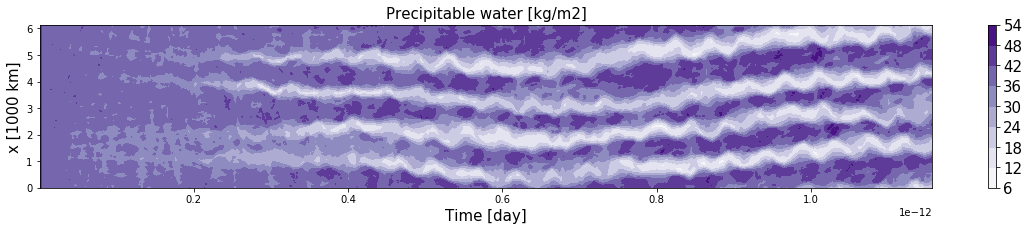

In [9]:
fz = 15

plt.figure(figsize=(20,3))

plt.contourf(PW300.time/(1e9*24*3600),PW300.x/1e6,PW300.prw.mean(dim='y').values.T,cmap='Purples')
plt.xlabel('Time [day]',fontsize=fz)
plt.ylabel('x [1000 km]',fontsize=fz)
plt.title('Precipitable water [kg/m2]',fontsize=fz)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=fz)

In [10]:
def find_separation_bin(field,vmin=45,vmax=55,bins=100):
# Inputs
# field = field from which to take the pdf
# vmin = minimal value of the interval over which min(PDF) will be searched
# vmax = maximal value //
# bins = Number of bins of the PDF

    field_hist,bin_edges = np.histogram(field.flatten(),bins=bins)
    bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])

    binary = (bin_mid<vmax)*(bin_mid>vmin)
    imin =  np.argmin(field_hist[binary])+np.argmax(binary)

    return bin_mid[imin],bin_mid

In [11]:
def find_sepmax_bin(field,vmin=45,vmax=55,bins=100):
# Inputs
# field = field from which to take the pdf
# vmin = minimal value of the interval over which min(PDF) will be searched
# vmax = maximal value //
# bins = Number of bins of the PDF

    field_hist,bin_edges = np.histogram(field.flatten(),bins=bins)
    bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])

    binary = (bin_mid<vmax)*(bin_mid>vmin)
    imin =  np.argmax(field_hist[binary])+np.argmax(binary)

    return bin_mid[imin],bin_mid

In [12]:
a,bin_m = find_sepmax_bin(PW300.prw[24:240,:,:].values,vmin=17,vmax=32,bins=100)

In [13]:
a

31.8134

In [30]:
field_hist,bin_edges = np.histogram(PW300.prw[2000:2400,:,:].values.flatten(),bins=100)
bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])

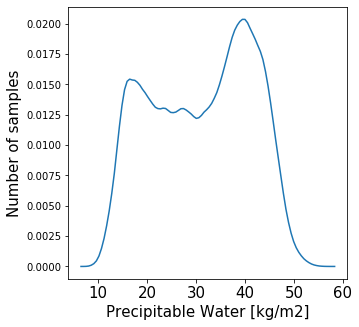

In [31]:
fz = 15

plt.figure(figsize=(5,5))

ax = plt.subplot(111)
ax.plot(bin_mid,field_hist/np.sum(field_hist))
#ax.axvline(x=a,color='k',linestyle='--')
plt.xlabel('Precipitable Water [kg/m2]',fontsize=fz)
plt.ylabel('Number of samples',fontsize=fz)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz) 

In [32]:
a

31.8134

In [33]:
dx = (PW300.x[1]-PW300.x[0]).values
print(dx)

3000.0


In [17]:
PW300.prw[::24,:,:].shape

(100, 128, 2048)

In [40]:
WMI

array([0.07810634])

In [39]:
WMI = calc_WMI(PW300.prw[2000:2001,:,:],dx,CRH_sep=a,slices=1,circle=False)

2048


In [34]:
WMI_LC = calc_WMI(PW300.prw[::24,:,:],dx,CRH_sep=a,slices=1,circle=False)

204899


In [21]:
np.argmax(WMI_LC[1:])+1
WMI_LC[43]=0.5*(WMI_LC[42]+WMI_LC[44])

In [22]:
Iorg = np.zeros((100,1))
for it in range(100):
    Iorg[it] = calc_Iorg_complete(PW300.prw[24*it,:,:], thresholds=(a,1e3))

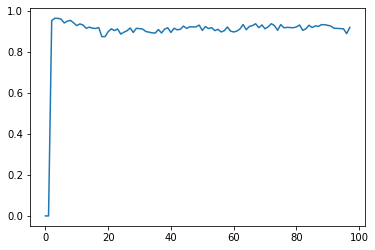

In [25]:
plt.plot(Iorg[2:])

Text(0.5, 0, 'Time [day]')

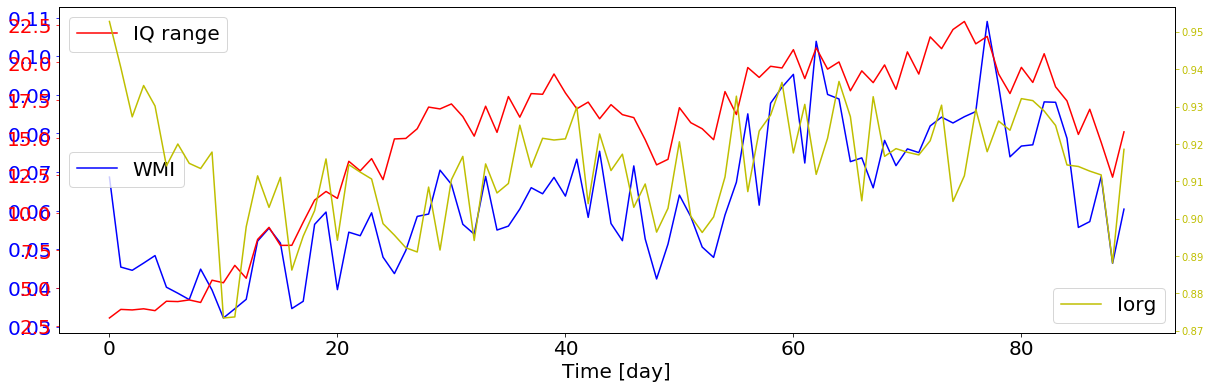

In [41]:
fz = 20

f = plt.figure(figsize=(20,6))

ax1 = plt.subplot(111)
ax1.plot(WMI_LC[10:],color='b',label='WMI')
ax1.yaxis.label.set_color('b')
ax1.tick_params(axis='y',colors='b')
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz)
plt.legend(fontsize=fz,loc='center left')

ax2 = plt.twinx()
ax2.plot(IQ[10:],color='r',label='IQ range')
ax2.yaxis.label.set_color('r')
ax2.tick_params(axis='y',colors='r')
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz)
plt.legend(fontsize=fz,loc='upper left')

ax3 = plt.twinx()
ax3.plot(Iorg[10:],color='y',label='Iorg')
ax3.yaxis.label.set_color('y')
ax3.tick_params(axis='y',colors='y')
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(fz)
plt.legend(fontsize=fz,loc='lower right')

ax1.set_xlabel('Time [day]',fontsize=fz)

In [27]:
Q1 = np.quantile(PW300.prw[::24,:,:],0.25,axis=(1,2))
Q3 = np.quantile(PW300.prw[::24,:,:],0.75,axis=(1,2))

In [28]:
IQ = Q3-Q1

In [ ]:
plt.figure(figsize=(15,5))

plt.contourf(PW300.time/(1e9*24*3600),PW300.x/1e6,binary.mean(dim='y').values.T,cmap='Purples')
plt.xlabel('Time [day]',fontsize=fz)
plt.ylabel('x [1000 km]',fontsize=fz)
plt.title('Precipitable water [kg/m2]',fontsize=fz)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=fz)

In [19]:
def calc_WMI(CRH,dx,CRH_sep=None, slices=1, circle=False):
    ### Input: precipitable water field (time, x, y)
    ### dx = Average grid spacing
    ### CRH_sep = Value separating moist and dry regions
    ### Returns: aggregation index calculated as 4*area*pi/(perimeter length)**2
    ###          which compares the length of the boundary between the moist and 
    ###          the dry region with the circumference of the moist region
    ###
    ### Option: slices, slice longitude into s slices and compute averge WMI over subregions
    
    assert slices > 0, 'slices needs to be at least 1'
    
    if CRH_sep==None: CRH_median = np.median(CRH, axis=(1,2))
    else: CRH_sep = np.expand_dims(CRH_sep,axis=0)
    tmp = np.repeat(CRH_sep[:, np.newaxis], CRH.shape[1], axis=1)
    CRH_median_rep = np.repeat(tmp[:,:,np.newaxis],CRH.shape[2],axis=2)
    
    binary = CRH>CRH_median_rep
    binary = binary.values #Convert to numpy array

    #split region into n slices, assume that longitude is last dimension
    #Todo, change axis to whatever longitude is
    binary=np.array_split(binary, slices, axis=2)
    binary=np.asarray(binary)
    
    A_tot = np.sum(binary,axis=(2,3))*(dx**2)/1e12
    perimeter_tot = np.zeros(CRH.shape[0])
    

#    for it in range(len(np.median(CRH,axis=(1,2)))):
    for it in range(len(np.median(CRH,axis=(1,2)))):
        print('it=',it,end="\r")
        for s in range(slices): 
            #print("calculating time step %i"%it)

            binary_boundary=np.copy(binary[s,it,:,:])
            binary_boundary[1:-1,:]=0
            perimeter_tot[it] = dx*(measure.perimeter(binary[s,it,:,:],8) - np.sum(binary_boundary))*1e3

    print(np.shape(CRH)[2])
    if circle == True:
        WMI = np.mean(4*np.pi*A_tot/perimeter_tot**2, axis=0)
    else:
        #Compare contour to the width of the domain
        WMI = 2*np.shape(CRH)[1]*dx*1e3/perimeter_tot #Compare to the width of the domain
        #WMI = perimeter_tot

    return WMI

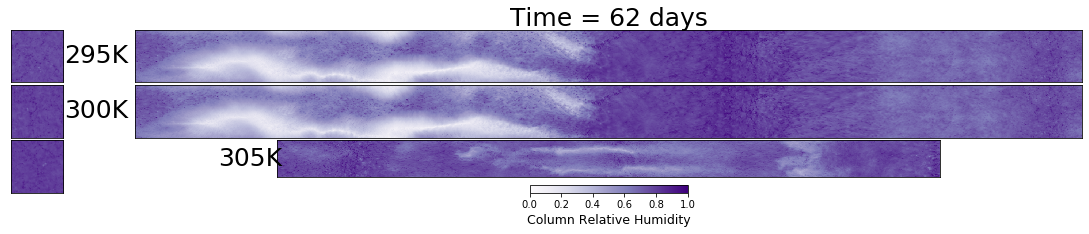

In [20]:
fz = 25
it = 1500
vmin = 0
vmax = 1

(f,sub) = plt.subplots(3,2,gridspec_kw={'width_ratios':[1,15],'wspace':0.05,'hspace':0.05})
f.set_size_inches((20,3))

for i in range(3):
    for j in range(2):
    
        if i==0 and j==0: CRH = PWs295.prw/PWs295.sprw;
        elif i==0 and j==1: CRH = PW295.prw/PW295.sprw;
        elif i==1 and j==0: CRH = PWs300.prw/PWs300.sprw;
        elif i==1 and j==1: CRH = PW300.prw/PW300.sprw;
        elif i==2 and j==0: CRH = PWs305.prw/PWs305.sprw;
        elif i==2 and j==1: CRH = PW305.prw/PW305.sprw;

        MAPPABLE = sub[i][j].imshow(CRH.values[it,:,:],\
                         vmin=vmin,vmax=vmax,cmap='Purples')
        sub[i][j].get_xaxis().set_ticks([])
        sub[i][j].get_yaxis().set_ticks([])
        
        if i==2 and j==1:
            cbar = plt.colorbar(MAPPABLE,orientation='horizontal')
            cbar.set_label('Column Relative Humidity', rotation=0, fontsize=fz/2)
        
        plt.subplots_adjust(wspace=0.05, hspace=0.05)
        
        if j==1: 
            if i==0: STR = '295K'
            elif i==1: STR = '300K'
            elif i==2: STR = '305K'
            plt.text(-0.041, 0.5,STR,horizontalalignment='center',
                     verticalalignment='center',
                     transform=sub[i][j].transAxes,
                     fontsize = fz)
            if i==0:
                plt.text(0.5,1.2,\
                         'Time = '+str(PW300.time[it].values/(1e9*24*3600))[:-11]+'days',\
                         horizontalalignment='center',
                         verticalalignment='center',
                         transform=sub[i][j].transAxes,
                         fontsize = fz)
                


# plt.savefig('JPG_DATA/it'+str(PW300.time[it].values/(1e9*24*3600))[:-11])
# # # Now adding the colorbar
# # cbar=plt.colorbar(extend="max",location='bottom')

In [56]:
plt.savefig('JPG_DATA/it'+str(PW300.time[it].values/(1e9*24*3600))[:-11])

<Figure size 432x288 with 0 Axes>

In [18]:
dir(sub)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__